# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime 
from datetime import date


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
output_data_file

'../output_data/cities.csv'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#url on where to pull the data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# print(query_url)

#create empty lists
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
town = []
counter = 1


print("Beginning Data Retrieval")
print("-"*40)
# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        town.append(city)
        print(f"Processing Record {counter} | {city}")
        counter +=1      
    except:
        print("City not found....skipping")
              
print("-"*40)     
print("Data Retrieval Complete")
print("-"*40)               

Beginning Data Retrieval
----------------------------------------
Processing Record 1 | cherskiy
Processing Record 2 | qaanaaq
Processing Record 3 | chokurdakh
Processing Record 4 | ushuaia
Processing Record 5 | dikson
Processing Record 6 | tres passos
City not found....skipping
Processing Record 7 | kieta
Processing Record 8 | maniitsoq
Processing Record 9 | barrow
Processing Record 10 | haines junction
Processing Record 11 | tullahoma
Processing Record 12 | vaini
Processing Record 13 | jamestown
Processing Record 14 | thompson
Processing Record 15 | bulgan
Processing Record 16 | punta arenas
Processing Record 17 | port alfred
Processing Record 18 | ranong
Processing Record 19 | hilo
Processing Record 20 | port keats
Processing Record 21 | cape town
Processing Record 22 | fortuna
Processing Record 23 | wanning
City not found....skipping
Processing Record 24 | ribeira grande
Processing Record 25 | coahuayana
Processing Record 26 | umm lajj
Processing Record 27 | deputatskiy
Processing 

Processing Record 226 | ust-maya
Processing Record 227 | gigmoto
Processing Record 228 | chenove
Processing Record 229 | elko
Processing Record 230 | cairns
Processing Record 231 | husavik
Processing Record 232 | iqaluit
Processing Record 233 | kutum
Processing Record 234 | hambantota
Processing Record 235 | ilulissat
Processing Record 236 | podgornoye
Processing Record 237 | clarence town
Processing Record 238 | dunedin
Processing Record 239 | sechura
City not found....skipping
Processing Record 240 | colares
City not found....skipping
Processing Record 241 | mwene-ditu
Processing Record 242 | stepnyak
Processing Record 243 | nanortalik
Processing Record 244 | pevek
Processing Record 245 | encruzilhada
Processing Record 246 | bargarh
Processing Record 247 | cartagena
Processing Record 248 | vostok
Processing Record 249 | usinsk
City not found....skipping
City not found....skipping
Processing Record 250 | faya
Processing Record 251 | tulu bolo
Processing Record 252 | quatre cocos
Proce

City not found....skipping
Processing Record 461 | vestmannaeyjar
Processing Record 462 | yerbogachen
Processing Record 463 | matiguas
Processing Record 464 | betong
Processing Record 465 | ulladulla
Processing Record 466 | josanicka banja
City not found....skipping
City not found....skipping
Processing Record 467 | mezhdurechenskiy
Processing Record 468 | krasnoselkup
Processing Record 469 | zwedru
Processing Record 470 | ormara
Processing Record 471 | balabac
City not found....skipping
Processing Record 472 | adzope
Processing Record 473 | erenhot
Processing Record 474 | minot
Processing Record 475 | kukmor
Processing Record 476 | asyut
City not found....skipping
Processing Record 477 | nanakuli
Processing Record 478 | tiarei
Processing Record 479 | nome
City not found....skipping
Processing Record 480 | nantucket
Processing Record 481 | plettenberg bay
Processing Record 482 | jinka
Processing Record 483 | guhagar
Processing Record 484 | mackay
Processing Record 485 | storsteinnes
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": town,
    "Lat": lat,
    "Lng": lng,
    "Max temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}


weather_data = pd.DataFrame(weather_dict)
weather_data.to_csv(output_data_file)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,cherskiy,68.75,161.30,-4.72,86,100,4.45,RU,1607562405
1,qaanaaq,77.48,-69.36,3.27,88,100,3.53,GL,1607562406
2,chokurdakh,70.63,147.92,-21.06,88,100,3.49,RU,1607562406
3,ushuaia,-54.80,-68.30,44.60,93,90,6.93,AR,1607562406
4,dikson,73.51,80.55,-11.65,86,2,2.62,RU,1607562406


In [5]:
weather_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.870036,18.039585,53.271625,75.821300,53.915162,7.511300,1.607562e+09
std,32.738020,90.379993,26.715338,17.811212,41.252783,5.417485,6.599837e+01
min,-54.800000,-175.200000,-38.510000,13.000000,0.000000,0.430000,1.607562e+09
25%,-8.035000,-58.642500,37.095000,68.000000,1.000000,3.360000,1.607562e+09
50%,22.260000,23.435000,60.800000,80.500000,75.000000,6.005000,1.607562e+09
75%,43.852500,97.572500,74.315000,88.750000,96.000000,10.290000,1.607562e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,33.710000,1.607562e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
dry_cities = weather_data[weather_data["Humidity"]<=100]
dry_cities.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.870036,18.039585,53.271625,75.821300,53.915162,7.511300,1.607562e+09
std,32.738020,90.379993,26.715338,17.811212,41.252783,5.417485,6.599837e+01
min,-54.800000,-175.200000,-38.510000,13.000000,0.000000,0.430000,1.607562e+09
25%,-8.035000,-58.642500,37.095000,68.000000,1.000000,3.360000,1.607562e+09
50%,22.260000,23.435000,60.800000,80.500000,75.000000,6.005000,1.607562e+09
75%,43.852500,97.572500,74.315000,88.750000,96.000000,10.290000,1.607562e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,33.710000,1.607562e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.

high_humid = weather_data.index[weather_data["Humidity"]>100].tolist()

print(f"There are {len(high_humid)} cities with over 100% humidity")

There are 0 cities with over 100% humidity


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_data.drop(labels=high_humid,inplace=False)
clean_city_data.head()
clean_city_data.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.870036,18.039585,53.271625,75.821300,53.915162,7.511300,1.607562e+09
std,32.738020,90.379993,26.715338,17.811212,41.252783,5.417485,6.599837e+01
min,-54.800000,-175.200000,-38.510000,13.000000,0.000000,0.430000,1.607562e+09
25%,-8.035000,-58.642500,37.095000,68.000000,1.000000,3.360000,1.607562e+09
50%,22.260000,23.435000,60.800000,80.500000,75.000000,6.005000,1.607562e+09
75%,43.852500,97.572500,74.315000,88.750000,96.000000,10.290000,1.607562e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,33.710000,1.607562e+09


In [13]:
date = date.today()


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

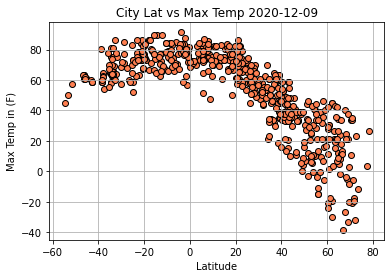

In [15]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Max temp']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temp in (F)')
plt.title(f'City Lat vs Max Temp {date}')
plt.grid()
plt.savefig("../output_data/lat_vs_temp.png")
plt.show()


## Latitude vs. Humidity Plot

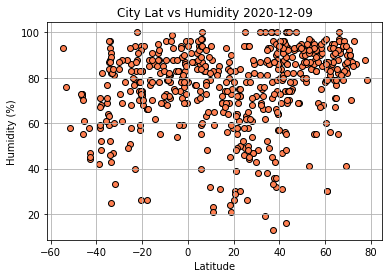

In [16]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Humidity']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Lat vs Humidity {date}')
plt.grid()
plt.savefig("../output_data/lat_vs_humidity.png")
plt.show()


## Latitude vs. Cloudiness Plot

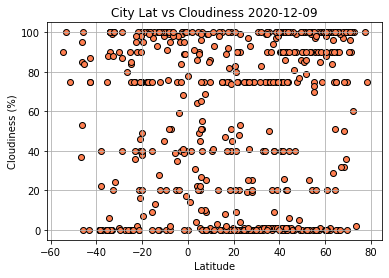

In [17]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Cloudiness']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Lat vs Cloudiness {date}')
plt.grid()
plt.savefig("../output_data/lat_vs_cloudiness.png")
plt.show()


## Latitude vs. Wind Speed Plot

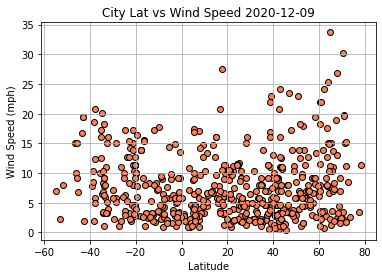

In [18]:
x_values = clean_city_data['Lat']
y_values = clean_city_data['Wind Speed']
plt.scatter(x_values,y_values, facecolors='coral', edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Lat vs Wind Speed {date}')
plt.grid()
plt.savefig("../output_data/lat_vs_wind_speed.png")
plt.show()


## Linear Regression

In [19]:
northern_df = clean_city_data[clean_city_data["Lat"]>0]

southern_df = clean_city_data[clean_city_data["Lat"]<0]

print(f"There are {northern_df.City.count()} cities in the northern hemisphere")
print(f"There are {southern_df.City.count()} cities in the southern hemisphere")

There are 378 cities in the northern hemisphere
There are 176 cities in the southern hemisphere


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7282315466003799


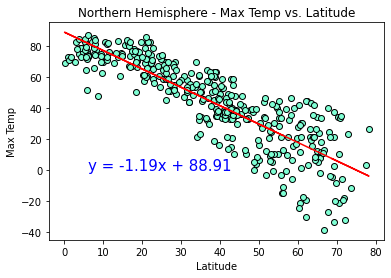

In [21]:
x_values = northern_df['Lat']
y_values = northern_df['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.31223724556609733


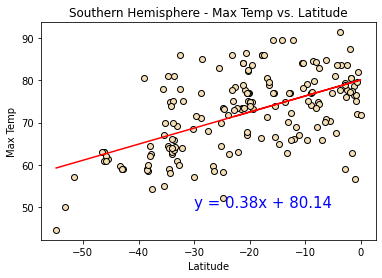

In [22]:
x_values = southern_df['Lat']
y_values = southern_df['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,50),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0647740367048004


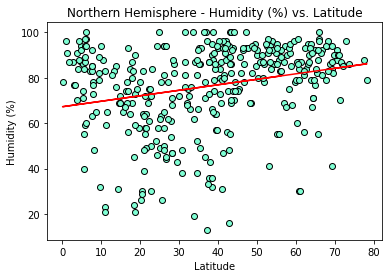

In [23]:
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,0),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10646443483763743


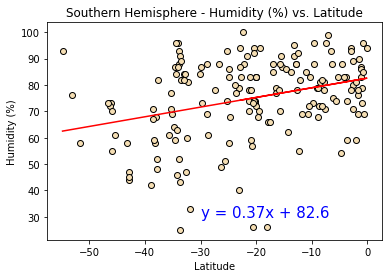

In [24]:
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title ('Southern Hemisphere - Humidity (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04946636312823932


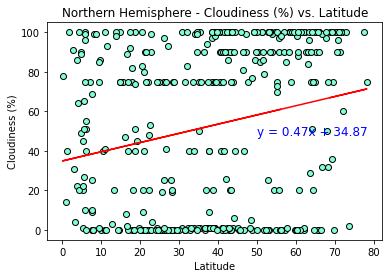

In [25]:
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,48),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.041943897159482185


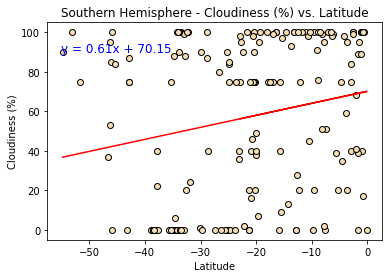

In [26]:
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,90),fontsize=12,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title ('Southern Hemisphere - Cloudiness (%) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03096168130280169


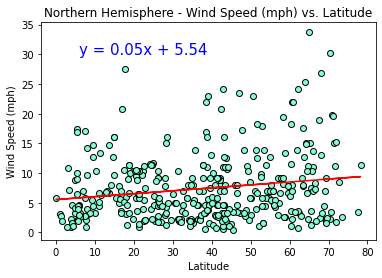

In [27]:
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='aquamarine', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,30),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.10461231916497424


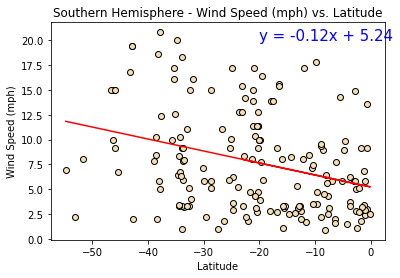

In [28]:
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, facecolors='wheat', edgecolors='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="blue")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title ('Southern Hemisphere - Wind Speed (mph) vs. Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.show()